<a href="https://colab.research.google.com/github/cristianquiroz6211/poo_project/blob/main/E07_Filtrado2D_solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>No se aceptan soluciones que usen metodologías distintas a la vistas en clases.</font>

<font color='orange'>Se puede usar el código de los ejemplos vistos en clases.</font>



# 1) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E07_Tu_Rut.ipynb" a "E07_12345678-9.ipynb"


# 2) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2,ifft2,fftshift,ifftshift

# 3) Filtro Anti-alising

(5 Puntos)

Para este ejericio:

* Descargar la siguiente imagen `https://www.dropbox.com/s/w9g7fgvfpimz6ww/CamisaRayas.jpg`

* Convertir la imagen a tonos de gris

* Submuestrear la imagen cada 8 pixeles en ambas direcciones (horizontal y vertical) y observar el efecto aliasing en la camisa a rayas.

* Corregir el efecto aliasing en la camisa a rayas usando filtros en el dominio de Fourier. La salida debe ser una imagen del mismo tamaño que la anterior sin el efecto aliasing.






In [ ]:
!wget https://www.dropbox.com/s/w9g7fgvfpimz6ww/CamisaRayas.jpg

--2022-10-03 18:13:57--  https://www.dropbox.com/s/w9g7fgvfpimz6ww/CamisaRayas.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w9g7fgvfpimz6ww/CamisaRayas.jpg [following]
--2022-10-03 18:13:58--  https://www.dropbox.com/s/raw/w9g7fgvfpimz6ww/CamisaRayas.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc30bfd28879b5c985cd742e2634.dl.dropboxusercontent.com/cd/0/inline/BuLFYsft6iJb66Ta62Kg9RYer2AgPqDqPjkADrf574xi42t-VlkrBrDS76D5Yi2fpYpkJbcyzudi2XSQZyUlrgKtHz0LZxYzIxcm-DtUSh0GTG25yZco0igTgEg59QEjouNFZw1pALlWBz2G8iga4laZmRWDeAeK4GyWWyU53xAlWg/file# [following]
--2022-10-03 18:13:58--  https://uc30bfd28879b5c985cd742e2634.dl.dropboxusercontent.com/cd/0/inline/BuLFYsft6iJb66Ta62Kg9RYer2AgPqDqPjkADrf574xi42t-VlkrBrDS76D5Yi2fpYpkJbc

In [ ]:
# Submuestreo cada s pixeles en ambas direcciones (horizontal y vertical)
def subsampling(X,s):
  (N,M) = X.shape
  N2 = int(N/s)
  M2 = int(M/s)

  Y = np.zeros((N2,M2))
  for i2 in range(N2):
    i = int(i2*s)
    for j2 in range(M2):
      j = int(j2*s)
      Y[i2,j2] = X[i,j]
  return Y

def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base



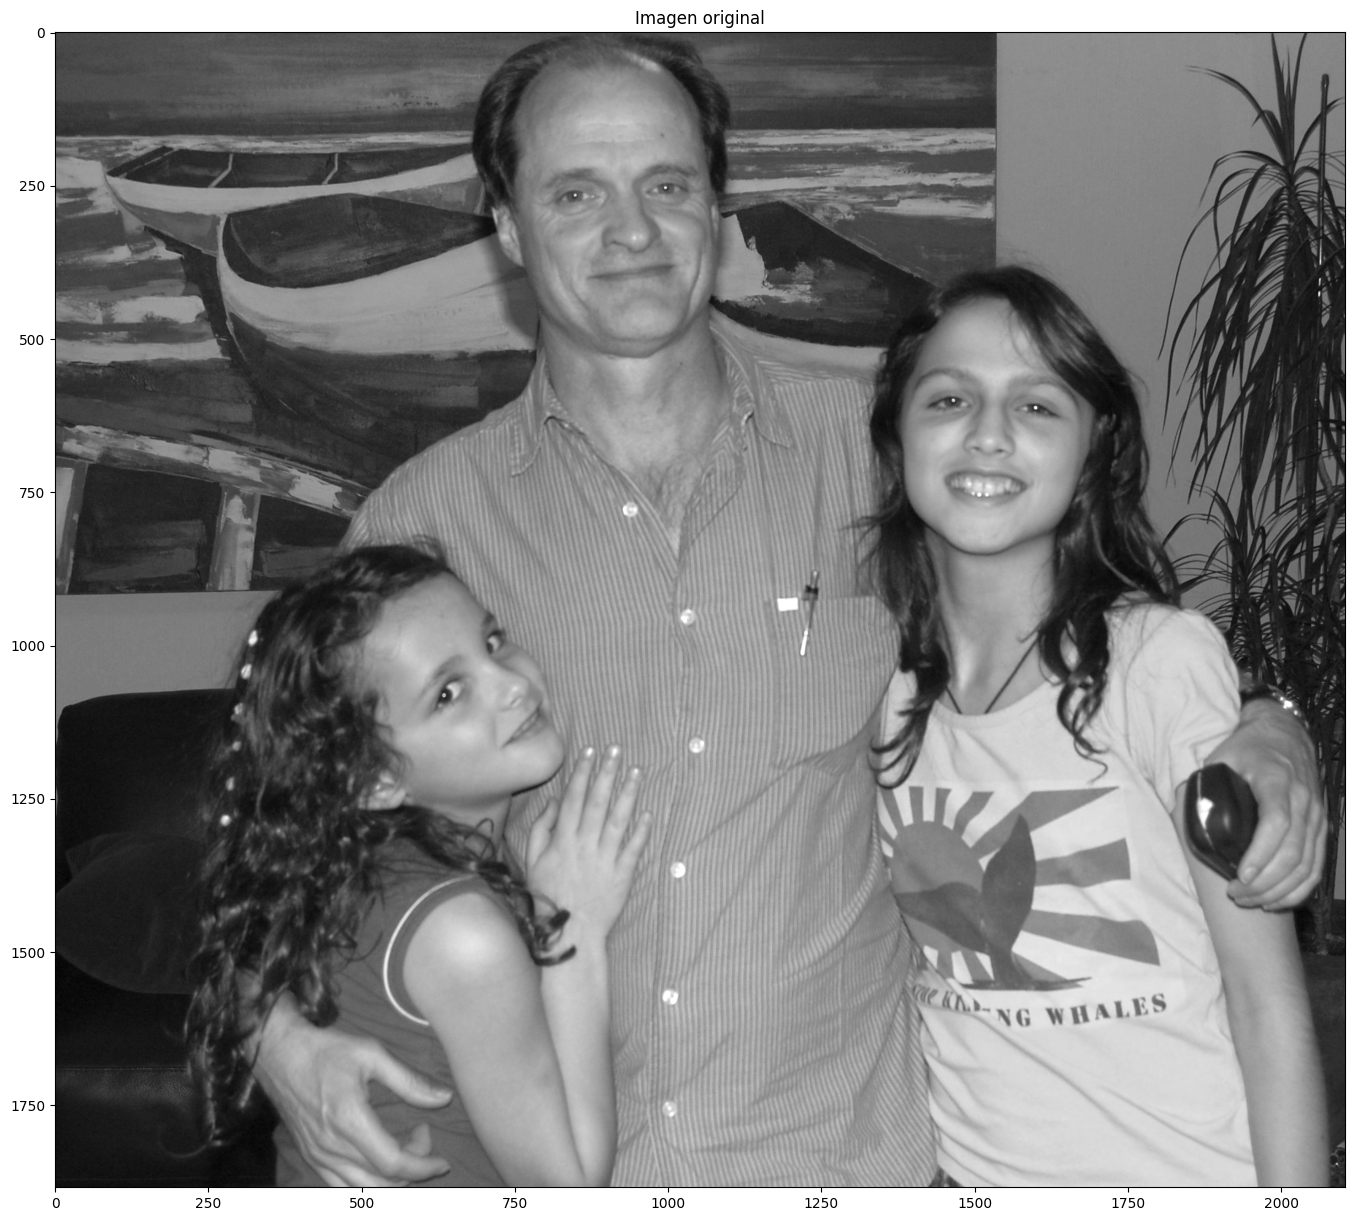

In [16]:
X = cv2.imread('CamisaRayas.jpg',0)
plt.figure(figsize=(30,15))
plt.imshow(X,cmap='gray')
plt.title("Imagen original")
plt.show()

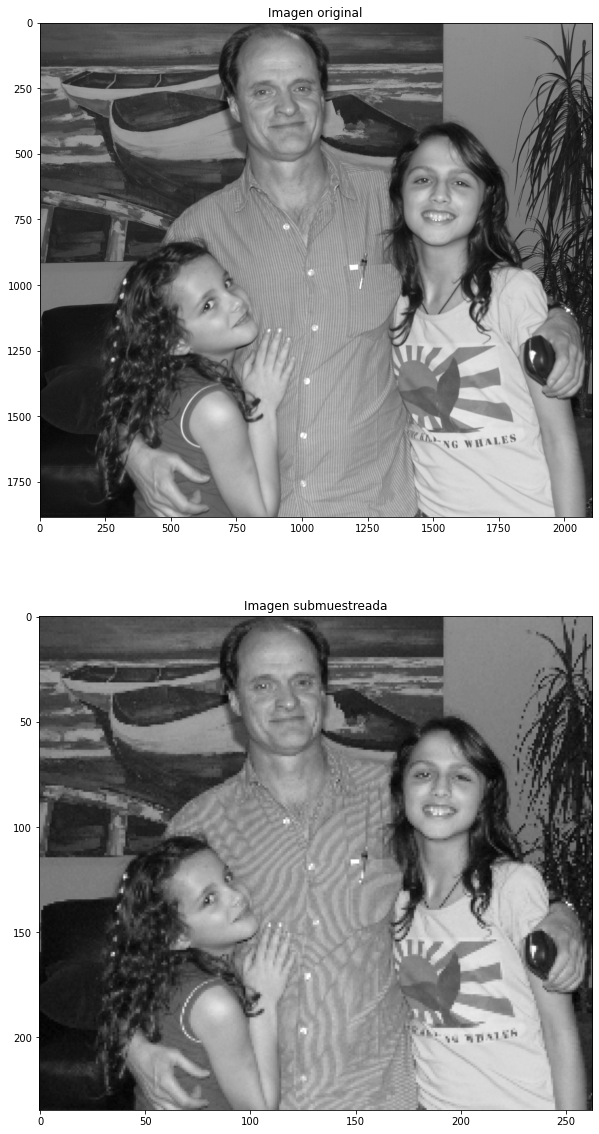

In [ ]:
# Submuestreo sin filtro anti-aliasing

m = 8 # submuestreo cada m pixeles
Y = subsampling(X,m)

plt.figure(figsize=(40,20))

plt.subplot(211),plt.imshow(np.abs(X), "gray"), plt.title("Imagen original")
plt.subplot(212),plt.imshow(np.abs(Y), "gray"), plt.title("Imagen submuestreada")

plt.show()




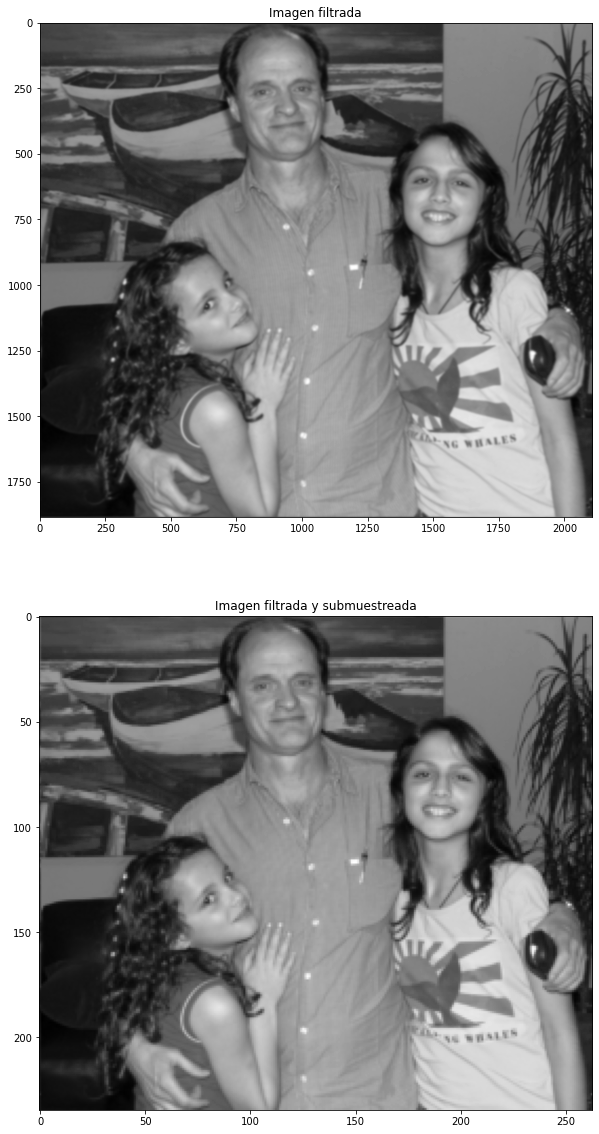

In [ ]:
X_ft = fft2(X)
X_ftc = fftshift(X_ft)

Do = 100

plt.figure(figsize=(40,20))


Yo_ftc = X_ftc * gaussianLP(Do,X.shape)
Yo_ft = ifftshift(Yo_ftc)
Yo = ifft2(Yo_ft).real

Y  = subsampling(Yo,m)

plt.subplot(211),plt.imshow(np.abs(Yo), "gray"), plt.title("Imagen filtrada")
plt.subplot(212),plt.imshow(np.abs(Y), "gray"), plt.title("Imagen filtrada y submuestreada")

plt.show()





# 4) Eliminación de Ruido
(4 Puntos)

Para este ejercicio,

* Descargar la imagen `https://www.dropbox.com/s/t4vps4sspp9ca0r/sailing_noise.png`

* Eliminar el ruido de la imagen usando un filtro Butterworth adecuado, es decir que no se vean anillos de replica alrededor del velero de la imagen.


<font color='orange'>NOTA: En este ejercicio se espera que elimine completamente el ruido de alta frecuencia, el resultado será una imagen borrosa sin ruido.</font>


In [ ]:
!wget https://www.dropbox.com/s/t4vps4sspp9ca0r/sailing_noise.png

--2022-10-03 18:16:22--  https://www.dropbox.com/s/t4vps4sspp9ca0r/sailing_noise.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4vps4sspp9ca0r/sailing_noise.png [following]
--2022-10-03 18:16:22--  https://www.dropbox.com/s/raw/t4vps4sspp9ca0r/sailing_noise.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc75c8d43c7a0ed81e6b1ea8f313.dl.dropboxusercontent.com/cd/0/inline/BuJdnYIS4vGlgP9VPt81oODPSlxSqdUHbwAAaO3CarIkiml37QNPCxT_qGDuk0Atz-a_Ct7-52mYw_sf9CedkMmjrApLs8XOfdYq7VHuHG4HourpaGE8WU9O9HgIzKhtEjX0Sygv6ylRGBgZ-dl0MefQGBrvPc-1-VE3vg4b9vmrOA/file# [following]
--2022-10-03 18:16:22--  https://uc75c8d43c7a0ed81e6b1ea8f313.dl.dropboxusercontent.com/cd/0/inline/BuJdnYIS4vGlgP9VPt81oODPSlxSqdUHbwAAaO3CarIkiml37QNPCxT_qGDuk0At

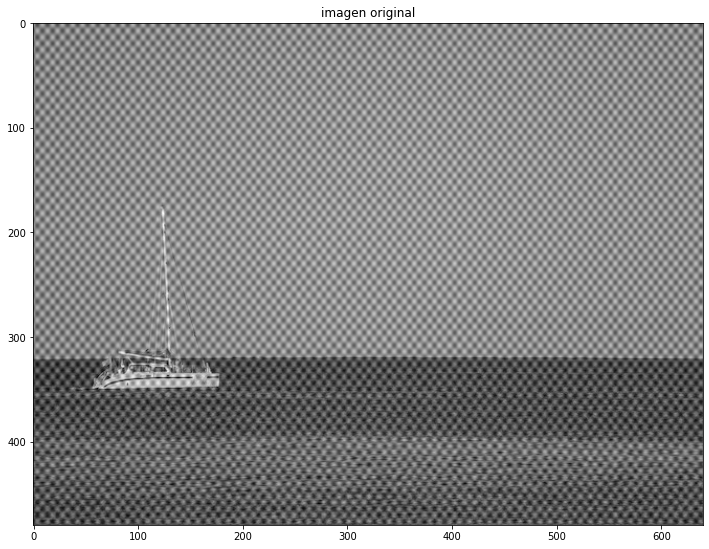

In [ ]:
X = cv2.imread('sailing_noise.png',0)
plt.figure(figsize=(12,10))

plt.imshow(X,cmap='gray')
plt.title('imagen original')
plt.show()

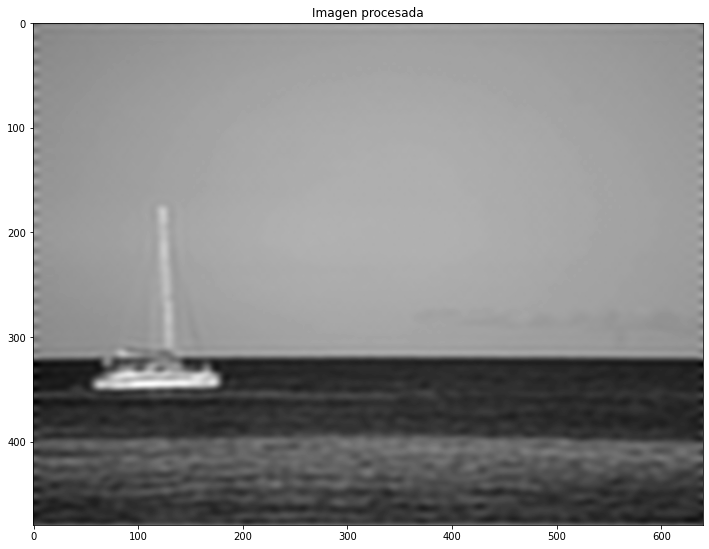

In [ ]:
Do = 50
n = 6
H = butterworthLP(Do,X.shape,n)

X_ft = fft2(X)
X_ftc = fftshift(X_ft)
Y_ftc = X_ftc * H
Y_ft_inv = ifftshift(Y_ftc)
Y = ifft2(Y_ft_inv).real
plt.figure(figsize=(12,10))

plt.imshow(np.abs(Y), "gray"), plt.title("Imagen procesada")
plt.show()

# 5) Filtro de agudización

(5 puntos)

Para el siguiente ejercicio,

* Descargar la imagen almacenada en `https://www.dropbox.com/s/z5i54drsqkt4vsu/blurdrops.png`

* Usando un filtro de agudización que utilice un filtro Gaussiano resalte los detalles de la imagen.


<font color='orange'>NOTA: En este ejercicio se espera una imagen de salida más nítida.</font>




In [ ]:
!wget https://www.dropbox.com/s/z5i54drsqkt4vsu/blurdrops.png

--2022-10-03 18:18:13--  https://www.dropbox.com/s/z5i54drsqkt4vsu/blurdrops.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/z5i54drsqkt4vsu/blurdrops.png [following]
--2022-10-03 18:18:13--  https://www.dropbox.com/s/raw/z5i54drsqkt4vsu/blurdrops.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucebedf86235d1a885d7f7997062.dl.dropboxusercontent.com/cd/0/inline/BuJpToMIHBLFls1T9LJeyNlWjM7poL-eMcqur45fVwxSzEN5ysIbQM8XhjExCuF2yQdx8dvn_3xeZ7BHCcwfo972I2EeORdvz__8O9zTem-1CYGV-BZUSbxws2M16zPd98vQEE1wqY_FN5mgjynOMXMfSn71reBunEnBY0mbgP9vjg/file# [following]
--2022-10-03 18:18:13--  https://ucebedf86235d1a885d7f7997062.dl.dropboxusercontent.com/cd/0/inline/BuJpToMIHBLFls1T9LJeyNlWjM7poL-eMcqur45fVwxSzEN5ysIbQM8XhjExCuF2yQdx8dvn_3xeZ

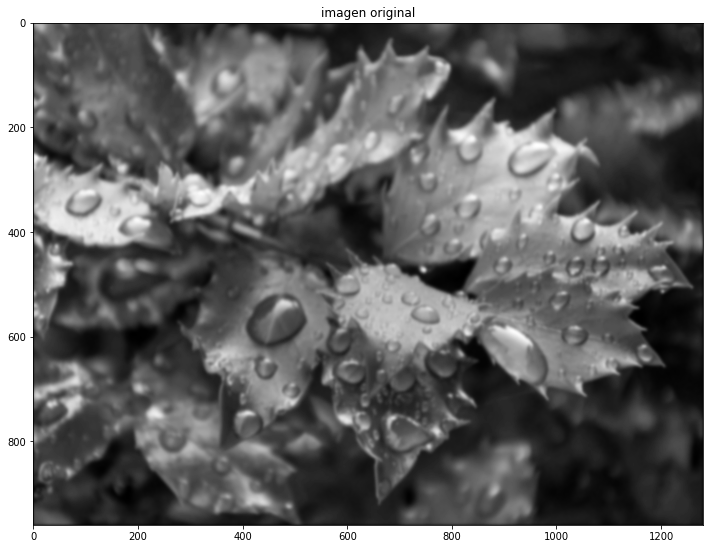

In [ ]:
X = cv2.imread('blurdrops.png',0)
plt.figure(figsize=(12,10))

plt.imshow(X,cmap='gray')
plt.title('imagen original')
plt.show()

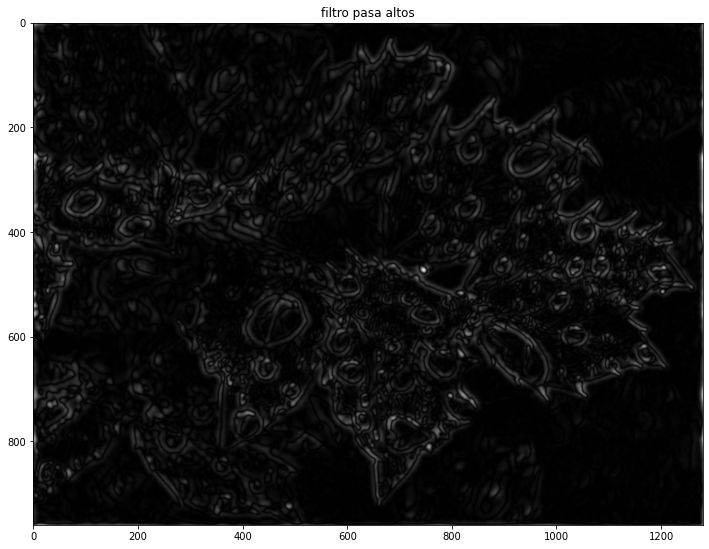

In [ ]:
Do = 40
n = 5
H = gaussianHP(Do,X.shape)
plt.figure(figsize=(12,10))

X_ft = fft2(X)
X_ftc = fftshift(X_ft)
Y_ftc = X_ftc * H
Y_ft_inv = ifftshift(Y_ftc)
Yhp = ifft2(Y_ft_inv).real
plt.imshow(np.abs(Yhp), "gray"), plt.title("filtro pasa altos")
plt.show()

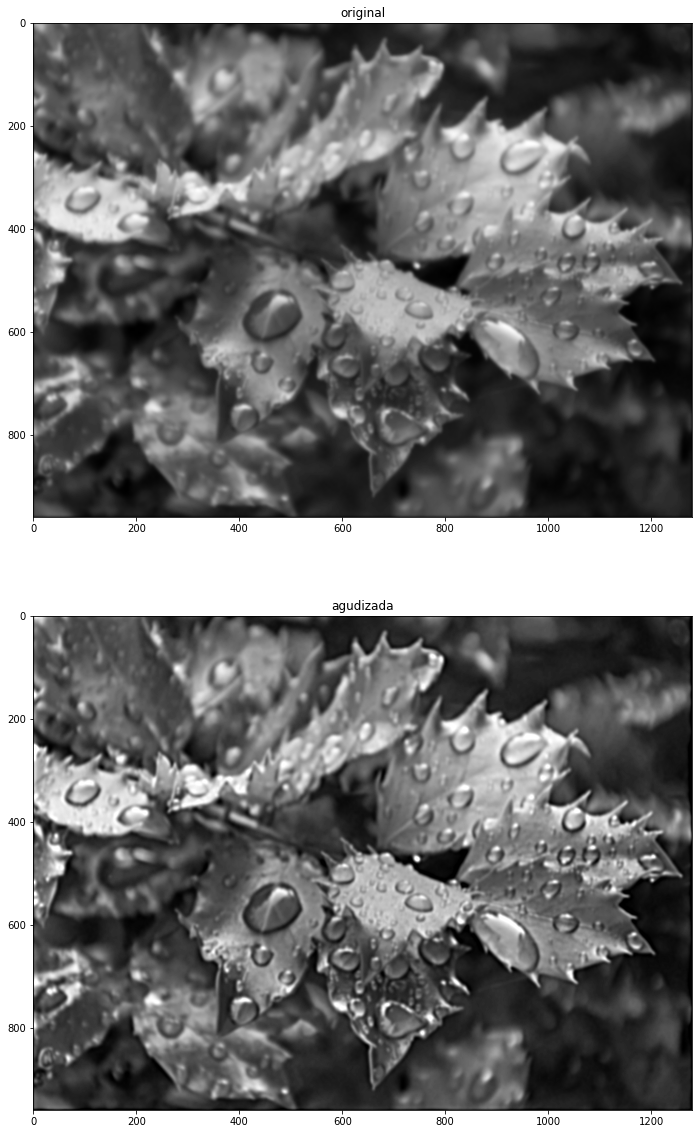

In [ ]:
plt.figure(figsize=(40,20))

k = 1.75
Y = X + k*Yhp
Y = np.clip(Y,0,255)

plt.subplot(211),plt.imshow(X,cmap='gray'),plt.title('original')
plt.subplot(212),plt.imshow(Y,cmap='gray'),plt.title('agudizada')

plt.show()



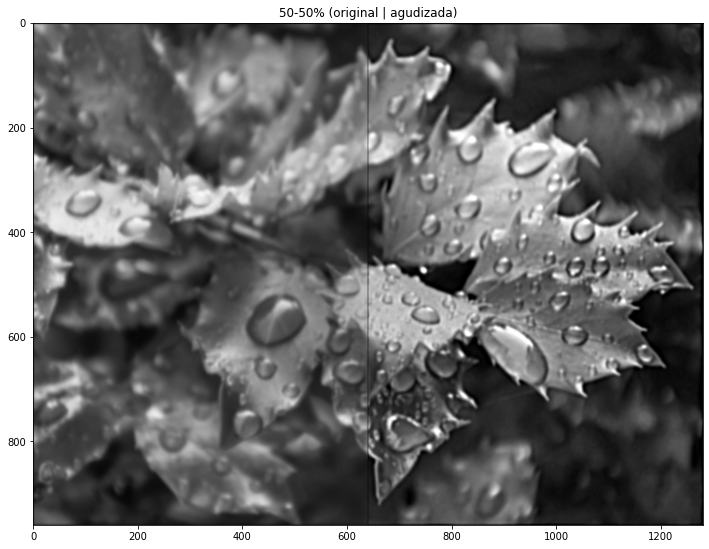

In [ ]:
(N,M) = X.shape
M2 = int(M/2)
Z = np.hstack([X[:,0:M2],np.zeros((N,1)),Y[:,M2:M]])
plt.figure(figsize=(12,10))
plt.imshow(Z, "gray"), plt.title("50-50% (original | agudizada)")
plt.show()

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A CANVAS</font>

